# Accessing and modifying DataFrames

## Columns

In [3]:
import pandas as pd
import numpy as np

myframe3 = pd.DataFrame(data=np.random.randn(5,5), index=['day1', 'day2', 'day3', 'day4', 'day5'], columns=['fiat', 'opel', 'ford', 'toyota', 'lux'])

print(myframe3['ford'])
print('')
print(myframe3[['ford', 'fiat']])

day1   -0.601100
day2    1.059559
day3    0.717919
day4   -0.025711
day5    0.776564
Name: ford, dtype: float64

          ford      fiat
day1 -0.601100 -0.644491
day2  1.059559  2.104877
day3  0.717919 -0.435918
day4 -0.025711  1.658462
day5  0.776564  0.802145


## Rows

In [4]:
print(myframe3.loc['day4'])

fiat      1.658462
opel     -0.017015
ford     -0.025711
toyota    0.744925
lux       0.596820
Name: day4, dtype: float64


In [6]:
print(myframe3.iloc[3])

fiat      1.658462
opel     -0.017015
ford     -0.025711
toyota    0.744925
lux       0.596820
Name: day4, dtype: float64


## Multiple rows and columns

In [8]:
print(myframe3.loc[['day1', 'day3'], ['fiat', 'opel']])

          fiat      opel
day1 -0.644491 -0.433514
day3 -0.435918  0.123176


## Access by conditionals

In [10]:
print(myframe3>0.0)

       fiat   opel   ford  toyota   lux
day1  False  False  False   False  True
day2   True   True   True   False  True
day3  False   True   True   False  True
day4   True  False  False    True  True
day5   True  False   True   False  True


In [11]:
print(myframe3.loc[['day1', 'day3'], ['fiat', 'opel']]>0.0)

       fiat   opel
day1  False  False
day3  False   True


In [21]:
print(myframe3[myframe3>0.0])

          fiat      opel      ford    toyota       lux     dacia
day1       NaN       NaN       NaN       NaN  0.233666  1.455945
day2  2.104877  0.253709  1.059559       NaN  0.516050  1.293024
day3       NaN  0.123176  0.717919       NaN  0.460545  0.620088
day4  1.658462       NaN       NaN  0.744925  0.596820       NaN
day5  0.802145       NaN  0.776564       NaN  1.301575  0.464028


## Add and remove columns

In [12]:
myframe3['dacia'] = np.random.randn(5,1)
print(myframe3)

          fiat      opel      ford    toyota       lux     dacia
day1 -0.644491 -0.433514 -0.601100 -0.284138  0.233666  1.455945
day2  2.104877  0.253709  1.059559 -0.624581  0.516050  1.293024
day3 -0.435918  0.123176  0.717919 -0.707894  0.460545  0.620088
day4  1.658462 -0.017015 -0.025711  0.744925  0.596820 -0.845375
day5  0.802145 -1.049710  0.776564 -0.940293  1.301575  0.464028


In [18]:
reduced = myframe3.drop(['day1'], axis=0)
print(reduced)
print('')
reduced2 = myframe3.drop(['fiat', 'opel'], axis=1)
print(reduced2)

          fiat      opel      ford    toyota       lux     dacia
day2  2.104877  0.253709  1.059559 -0.624581  0.516050  1.293024
day3 -0.435918  0.123176  0.717919 -0.707894  0.460545  0.620088
day4  1.658462 -0.017015 -0.025711  0.744925  0.596820 -0.845375
day5  0.802145 -1.049710  0.776564 -0.940293  1.301575  0.464028

          ford    toyota       lux     dacia
day1 -0.601100 -0.284138  0.233666  1.455945
day2  1.059559 -0.624581  0.516050  1.293024
day3  0.717919 -0.707894  0.460545  0.620088
day4 -0.025711  0.744925  0.596820 -0.845375
day5  0.776564 -0.940293  1.301575  0.464028


## Modify index

In [22]:
myframe3['new_index'] = ['d1', 'd2', 'd3', 'd4', 'd5']
myframe3.set_index('new_index', inplace=True)
print(myframe3)

               fiat      opel      ford    toyota       lux     dacia
new_index                                                            
d1        -0.644491 -0.433514 -0.601100 -0.284138  0.233666  1.455945
d2         2.104877  0.253709  1.059559 -0.624581  0.516050  1.293024
d3        -0.435918  0.123176  0.717919 -0.707894  0.460545  0.620088
d4         1.658462 -0.017015 -0.025711  0.744925  0.596820 -0.845375
d5         0.802145 -1.049710  0.776564 -0.940293  1.301575  0.464028


## Complex creation of a DataFrame

In [27]:
mydict = {'customer': ['Customer1', 'Customer2', 'Customer3'],
          'product1': [1.2, 1.3, 1.4],
          'product2': [2.2, 2.3, 2.1],
          'product3': [4.1, 4.2, 4.15]
         }
df1 = pd.DataFrame(mydict)
print(df1)

print('')
df2 = pd.DataFrame(mydict, index=['Hungary', 'Germany', 'Spain'])
print(df2)

print('')
df3 = df2.groupby('customer')
print(df3.describe())

    customer  product1  product2  product3
0  Customer1       1.2       2.2      4.10
1  Customer2       1.3       2.3      4.20
2  Customer3       1.4       2.1      4.15

          customer  product1  product2  product3
Hungary  Customer1       1.2       2.2      4.10
Germany  Customer2       1.3       2.3      4.20
Spain    Customer3       1.4       2.1      4.15

          product1                                   product2       ...       \
             count mean std  min  25%  50%  75%  max    count mean  ...  75%   
customer                                                            ...        
Customer1      1.0  1.2 NaN  1.2  1.2  1.2  1.2  1.2      1.0  2.2  ...  2.2   
Customer2      1.0  1.3 NaN  1.3  1.3  1.3  1.3  1.3      1.0  2.3  ...  2.3   
Customer3      1.0  1.4 NaN  1.4  1.4  1.4  1.4  1.4      1.0  2.1  ...  2.1   

               product3                                          
           max    count  mean std   min   25%   50%   75%   max  
customer         

## Various interesting possibilities

In [33]:
from matplotlib import pyplot as plt

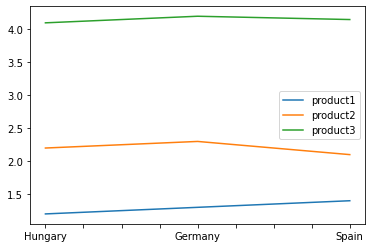

<class 'pandas.core.series.Series'>
4.2
        customer  product1  product2  product3
Hungary      NaN       NaN       NaN       NaN
Germany      NaN       NaN       NaN       4.2
Spain        NaN       NaN       NaN       NaN


In [53]:
# Plotting the data
df2.plot()
plt.show()

# Get the max of 'product3'
maxval = df2.describe().loc[['max']]['product3']
print(type(maxval))

# And print the value
print(maxval.iloc[0])

# Then search the rest of the data
print(df2[df2==maxval.iloc[0]])